# 1. Dynamics on Networks

The goal of this notebook is to explore dynamics on a given network.

The network chosen by the study has been the bible net network filtering the weights by 10 (having at elast 10 co-ocurrences), from this network we filter by names (discarding locations) and select the main connected component.

The dynamic model implemented has been the Kuramoto model, in particular we set all $\omega_i = 0$ and $\theta_i = 0$ except fo the case of judah, wher we fix $\theta_\text{judah} = 2$.

The goal of this simmulation is to produce a beautyful animation useful in a story telling perpective, not actually being factually correct or accurate, we are simulating how *sin* is spread, being *sin" initiated by *Judah*.

## 1.1 Read the Network

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pylab import *

In [2]:
#Returns the connected component of a given network G
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

Read bible newtork having weights > 10 (edge weight, i.e. co-ocurrences of words)

In [3]:
edges = pd.read_csv("data/data.csv",header = None)
edges.columns = ["from", "to", "weight"]
edges = edges[edges.weight>10]

G = nx.from_pandas_edgelist(edges, *edges.columns)

Read the type attribute for the nate (name/location) and filter only names (i.e. no-locations)

In [4]:
#Read file of locations
df_labs =  pd.read_excel("data/labels.xlsx", sheet_name="Sheet2")
locations = df_labs[df_labs["Location"] == 1]["Node"]
locations = [str(x).replace("'", "").replace(" ", "") for x in locations]

#initialize atribut of net with a dictionary
node_dict = dict(G.nodes(data = "location", default = False))

#set values to the dictionary
for l in locations:
    node_dict[l] = True

#set the dictionary as an atribute to the network
nx.set_node_attributes(G, node_dict, "location")

#filter out the non location values 
non_locations = [x for x in list(G.nodes) if x not in locations]
G_noloc = G.subgraph(non_locations)

Get central component and plot it

In [9]:
Gc_noloc = max(connected_component_subgraphs(G_noloc), key=len)
pos = nx.spring_layout(Gc_noloc,seed = 3)

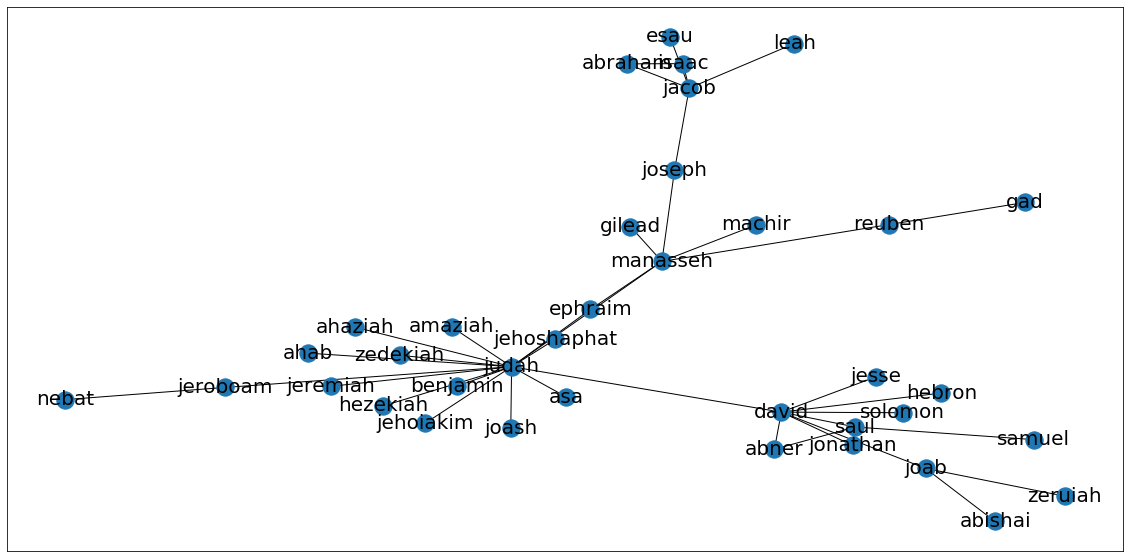

In [10]:
plt.figure(figsize=(20, 10))
nx.draw_networkx(Gc_noloc,pos = pos,font_size = 20)
plt.draw()

## 1.2. Create animation

This code is based on http://pycx.sourceforge.net/

An animation prompt should pop up.

In [11]:
#This code is bas

import pycxsimulator
from pylab import *

import networkx as nx

def initialize():
    i=0
    global g, nextg
#     g = nx.karate_club_graph()
    g = nx.convert_node_labels_to_integers(Gc_noloc)
    g.pos = nx.spring_layout(g, seed = 3)
    for i in g.nodes:
        if i == list(Gc_noloc.nodes).index("judah"):
            g.nodes[i]['theta'] = 2
            g.nodes[i]['omega'] = 0
        else:
            g.nodes[i]['theta'] = 0
            g.nodes[i]['omega'] = 0

    nextg = g.copy()
    nextg.pos = g.pos
    
def observe():
    global g, nextg
    cla()
    nx.draw(g, cmap = cm.hsv, vmin = -1, vmax = 1,
            node_color = [sin(g.nodes[i]['theta']) for i in g.nodes],
            pos = g.pos)

alpha = 1 # coupling strength
Dt = 0.01 # Delta t

def update():
    global g, nextg
    for i in g.nodes:
        theta_i = g.nodes[i]['theta']
        nextg.nodes[i]['theta'] = theta_i + (g.nodes[i]['omega'] + alpha * ( \
            sum([sin(g.nodes[j]['theta'] - theta_i) for j in g.neighbors(i)]) \
            / g.degree(i))) * Dt
    g, nextg = nextg, g

pycxsimulator.GUI().start(func=[initialize, observe, update])


## 1.3 Offline reveiw of the animation

In the animation one can see that *Judah* starts being the only sinner, first the sin spread to their closer neighbours making them sinners and as time goes the sin is spreaded all across the network making judah not as much as a sinner as he was in the beggining but none of the nodes being pure.

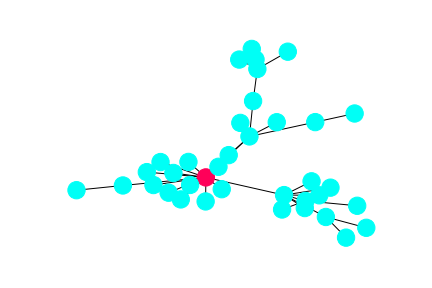

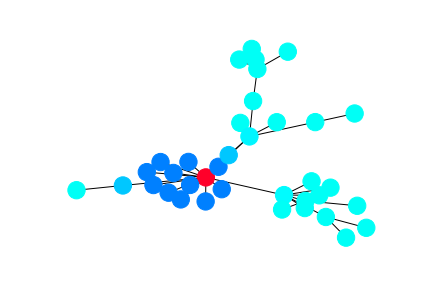

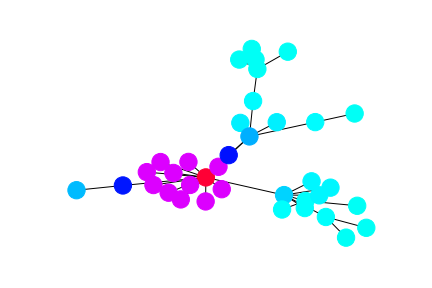

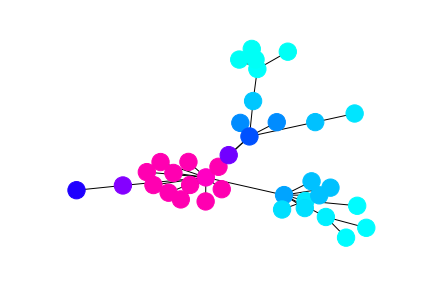

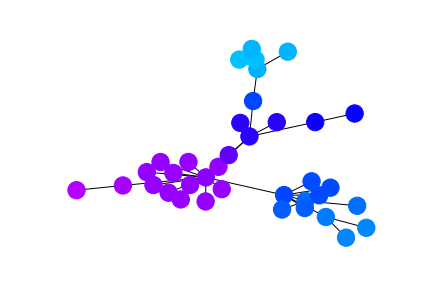

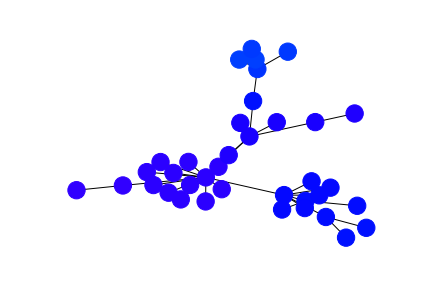

In [21]:
from IPython.display import Image
from IPython.display import display
a = Image(filename='simulation/0.png') 
b = Image(filename='simulation/1.png')
c = Image(filename='simulation/2.png') 
d = Image(filename='simulation/3.png') 
e = Image(filename='simulation/4.png') 
f = Image(filename='simulation/5.png') 
display(a,b,c,d,e,f)